## Load modules

In [110]:
# -*- coding: utf-8 -*-
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
#from scipy.ndimage import gaussian_filter1d
import sys

## Parameters

In [130]:
date = '20211126'
dataNo = 2
scanNo = 2

## Data Preparation

In [131]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

Analysis area
--

In [132]:
#Analysis area
x0 = 1; x1 = 127
y0 = 1; y1 = 127

width = x1- x0
height = y1- y0

## Image averaging

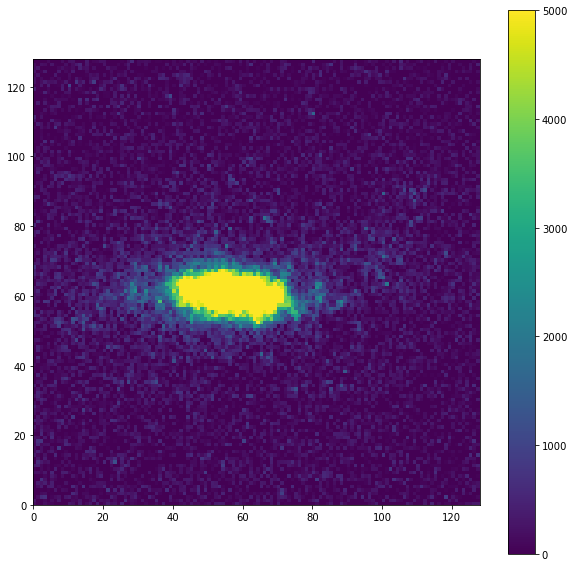

In [133]:
share = Path(path_img)
if share.exists():
    TOFtime = scan_data['T0008: TOF time (msec.)']
    
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
    TOFtimes = []
    params = []; params_err = []
    cx0 = []; cy0 = []
    cx0_err = []; cy0_err = []
    wx0 = []; wy0 = []
    wx0_err = []; wy0_err = []
    
    OD_sum = []
    img_sub_ave = np.zeros([height, width], dtype=np.float64)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

mappable =ax.pcolormesh(img_trans_ave, vmin=0, vmax=5000, shading='auto')
ax.set_aspect('equal')
fig.colorbar(mappable)

plt.show()

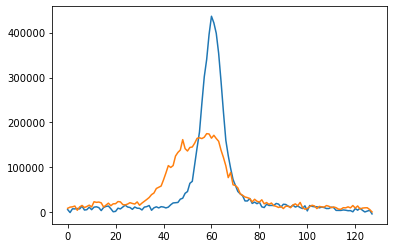

In [129]:
plt.plot(np.sum(img_trans_ave,axis=1))
plt.plot(np.sum(img_trans_ave,axis=0))

In [106]:
CoMx=[]
CoMy=[]
nx=np.sum(img_trans_ave, axis=1)/np.sum(img_trans_ave)
ny=np.sum(img_trans_ave, axis=0)/np.sum(img_trans_ave)
for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
print("(Cx,Cy)=(%.01f,%.01f)" %(np.sum(CoMx),np.sum(CoMy)))

(Cx,Cy)=(59.9,69.0)
